<div style="
    background: linear-gradient(90deg,rgb(251, 255, 10), #ff758c, #ff4d6d);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    font-size: 20px;
    font-weight: bold;
    text-align: center;">
Deep Learning Based NLP
</div>



In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
lines = [
    'It was a nice rainy day.',
    'The Things are so beautiful in his point.',
    'When you focus is clear, you won.',
    'Many many happy returns of the day.'
]

In [3]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(lines)

Tokenizing

In [4]:
tokenizer.word_docs

defaultdict(int,
            {'it': 1,
             'rainy': 1,
             'was': 1,
             'nice': 1,
             'day': 2,
             'a': 1,
             'the': 2,
             'in': 1,
             'are': 1,
             'his': 1,
             'things': 1,
             'point': 1,
             'beautiful': 1,
             'so': 1,
             'focus': 1,
             'clear': 1,
             'is': 1,
             'you': 1,
             'won': 1,
             'when': 1,
             'happy': 1,
             'returns': 1,
             'many': 1,
             'of': 1})

In [5]:
tokenizer.index_word, tokenizer.index_docs

({1: 'day',
  2: 'the',
  3: 'you',
  4: 'many',
  5: 'it',
  6: 'was',
  7: 'a',
  8: 'nice',
  9: 'rainy',
  10: 'things',
  11: 'are',
  12: 'so',
  13: 'beautiful',
  14: 'in',
  15: 'his',
  16: 'point',
  17: 'when',
  18: 'focus',
  19: 'is',
  20: 'clear',
  21: 'won',
  22: 'happy',
  23: 'returns',
  24: 'of'},
 defaultdict(int,
             {5: 1,
              9: 1,
              6: 1,
              8: 1,
              1: 2,
              7: 1,
              2: 2,
              14: 1,
              11: 1,
              15: 1,
              10: 1,
              16: 1,
              13: 1,
              12: 1,
              18: 1,
              20: 1,
              19: 1,
              3: 1,
              21: 1,
              17: 1,
              22: 1,
              23: 1,
              4: 1,
              24: 1}))

In [6]:
mat = tokenizer.texts_to_matrix(lines)

mat.shape, mat

((4, 25),
 array([[0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
         1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 1., 1., 1., 1., 1., 0., 0., 0.],
        [0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 1., 1., 1.]]))

Sequencing

In [7]:
seq = tokenizer.texts_to_sequences(lines)

seq

[[5, 6, 7, 8, 9, 1],
 [2, 10, 11, 12, 13, 14, 15, 16],
 [17, 3, 18, 19, 20, 3, 21],
 [4, 4, 22, 23, 24, 2, 1]]

Sequence Padding

In [8]:
padded = pad_sequences(seq, maxlen=10, padding='post')
padded

array([[ 5,  6,  7,  8,  9,  1,  0,  0,  0,  0],
       [ 2, 10, 11, 12, 13, 14, 15, 16,  0,  0],
       [17,  3, 18, 19, 20,  3, 21,  0,  0,  0],
       [ 4,  4, 22, 23, 24,  2,  1,  0,  0,  0]], dtype=int32)

In [9]:
padded = pad_sequences(seq, maxlen=10, padding='pre')
padded

array([[ 0,  0,  0,  0,  5,  6,  7,  8,  9,  1],
       [ 0,  0,  2, 10, 11, 12, 13, 14, 15, 16],
       [ 0,  0,  0, 17,  3, 18, 19, 20,  3, 21],
       [ 0,  0,  0,  4,  4, 22, 23, 24,  2,  1]], dtype=int32)

<div style="
    background: linear-gradient(90deg,rgb(251, 255, 10), #ff758c, #ff4d6d);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    font-size: 17px;
    font-weight: bold;
    text-align: center;">
-----------------------------------------------------------------------------------------------------------------------------------------
</div>


<div style="
    background: linear-gradient(90deg,rgb(251, 255, 10), #ff758c, #ff4d6d);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    font-size: 17px;
    font-weight: bold;
    text-align: center;">
    Sentiment Analysis
</div>


In [10]:
import numpy as np
import string, re, nltk, os
from os import listdir, path
from nltk.corpus import stopwords
from keras.utils import plot_model
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [11]:
neg_dir = '/content/drive/MyDrive/Colab Notebooks/datasets/review_polarity/txt_sentoken/neg'
pos_dir = '/content/drive/MyDrive/Colab Notebooks/datasets/review_polarity/txt_sentoken/pos'
vocab_loc = '/content/drive/MyDrive/Colab Notebooks/datasets/vocab.txt'

In [12]:
def load_doc(filename):
    file = open(filename, 'r')
    text = file.read()
    file.close()
    return text

In [13]:
stop_words = set(stopwords.words('english'))
def clean_doc(doc):
    tokens = doc.split()

    removed_punctuations = re.compile('[%s]' % re.escape(string.punctuation))
    tokens = [removed_punctuations.sub('', w) for w in tokens]

    tokens = [token for token in tokens if token.isalpha()]

    tokens = [token for token in  tokens if token not in stop_words]

    tokens = [token for token in  tokens if len(token) > 1]

    return  tokens


In [15]:
vocabs = load_doc(vocab_loc).split('\n')
print(vocabs)

['sometimes', 'tip', 'hat', 'film', 'jump', 'bandwagon', 'enjoy', 'ride', 'saw', 'truman', 'show', 'audience', 'full', 'teenagers', 'doubt', 'drawn', 'ace', 'ventura', 'hoping', 'see', 'latest', 'take', 'fart', 'jokes', 'surprised', 'may', 'realized', 'picture', 'actually', 'something', 'say', 'crowd', 'id', 'cant', 'tell', 'yet', 'really', 'good', 'seems', 'comparison', 'awful', 'mountain', 'crap', 'spewed', 'forth', 'bowls', 'hollywood', 'far', 'year', 'time', 'alone', 'make', 'call', 'end', 'burbanks', 'side', 'concerned', 'wanted', 'win', 'felt', 'tribute', 'jim', 'carrey', 'achieved', 'legitimacy', 'last', 'best', 'viewed', 'cold', 'little', 'possible', 'plot', 'unless', 'youre', 'media', 'blackout', 'however', 'probably', 'know', 'basics', 'stars', 'burbank', 'everyman', 'insurance', 'agent', 'living', 'beautiful', 'wife', 'meryl', 'laura', 'linney', 'south', 'florida', 'island', 'town', 'seahaven', 'looks', 'like', 'michael', 'idea', 'perfect', 'american', 'small', 'would', 'see

In [16]:
def doc_to_line(filename, vocabs):
    doc = load_doc(filename)
    tokens = clean_doc(doc)
    tokens = [w for w in tokens if w in vocabs]
    return tokens

In [17]:
print(doc_to_line(path.join(neg_dir, listdir(neg_dir)[0]), vocabs=vocabs))

['ask', 'eight', 'really', 'wholesome', 'surveillance', 'man', 'loses', 'sight', 'values', 'becoming', 'seedy', 'sleazy', 'underworld', 'hardcore', 'pornography', 'business', 'bubbling', 'beneath', 'surface', 'theres', 'sordid', 'world', 'sick', 'depraved', 'people', 'wont', 'necessarily', 'stop', 'short', 'murder', 'order', 'satisfy', 'sick', 'twisted', 'desires', 'position', 'influence', 'making', 'kinds', 'films', 'sick', 'demented', 'people', 'want', 'see', 'im', 'talking', 'snuff', 'films', 'supposed', 'documentaries', 'victims', 'brutalized', 'killed', 'camera', 'im', 'talking', 'films', 'like', 'director', 'joel', 'schumacher', 'recent', 'run', 'big', 'budget', 'movies', 'credit', 'batman', 'robin', 'time', 'kill', 'batman', 'forever', 'client', 'schumacher', 'certainly', 'kind', 'influence', 'something', 'really', 'want', 'see', 'probably', 'first', 'twothirds', 'unwind', 'fairly', 'conventional', 'missing', 'persons', 'drama', 'albeit', 'particularly', 'unsavory', 'core', 'thr

In [18]:
len(listdir(neg_dir))

1010

In [19]:
def process_train(dicretory):
    documents = []
    for filename in listdir(dicretory):
        if not filename.startswith('cv9'):
            path = os.path.join(dicretory, filename)
            doc = load_doc(path)
            tokens = clean_doc(doc)
            documents.append(tokens)
    return documents

def process_test(dicretory):
    documents = []
    for filename in listdir(dicretory):
        if filename.startswith('cv9'):
            path = os.path.join(dicretory, filename)
            doc = load_doc(path)
            tokens = clean_doc(doc)
            documents.append(tokens)
    return documents

In [20]:
def process_docs(dicretory, is_train):
    documents = []
    for filename in listdir(dicretory):
        if is_train and filename.startswith('cv9'):
            continue
        if not is_train and not filename.startswith('cv9'):
            continue
        path = os.path.join(dicretory, filename)
        doc = load_doc(path)
        tokens = clean_doc(doc)
        documents.append(tokens)
    return documents



In [21]:
print(process_docs(pos_dir, False))

[['steve', 'martin', 'took', 'extended', 'vacation', 'facets', 'moviemaking', 'years', 'back', 'spent', 'time', 'writing', 'essays', 'short', 'stories', 'new', 'yorker', 'several', 'wound', 'hilarious', 'hardback', 'compilation', 'pure', 'drivel', 'much', 'book', 'spares', 'tinseltown', 'mockery', 'although', 'riff', 'racist', 'comments', 'made', 'marlon', 'brando', 'larry', 'king', 'interview', 'fine', 'chapter', 'called', 'search', 'wily', 'filipino', 'writer', 'star', 'bowfinger', 'offers', 'masses', 'plenty', 'good', 'reasons', 'pursue', 'career', 'cinema', 'perhaps', 'finally', 'venting', 'frustrations', 'everything', 'made', 'crap', 'led', 'brief', 'retirement', 'hollywood', 'martin', 'stars', 'bobby', 'bowfinger', 'roger', 'cormanwannabe', 'cusp', 'fifty', 'desperate', 'success', 'producer', 'quality', 'projects', 'damned', 'accountant', 'adam', 'aleximalle', 'proposes', 'movie', 'called', 'chubby', 'rain', 'aliens', 'travel', 'earth', 'raindrops', 'slightly', 'fatter', 'regular

In [22]:
def load_clean_dataset(is_train):
    neg = process_docs(neg_dir, is_train)
    pos = process_docs(pos_dir, is_train)
    docs = neg + pos
    labels = [0 for _ in range(len(neg))] + [1 for _ in range(len(pos))]
    return docs, labels

In [23]:
train, train_labels = load_clean_dataset(True)
test, test_labels  = load_clean_dataset(False)

len(train), len(train_labels), len(test), len(test_labels)

(1810, 1810, 200, 200)

In [24]:
from collections import Counter
Counter(train_labels)

Counter({0: 910, 1: 900})

In [25]:
def create_tokenizer(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

In [26]:
tokenizer = create_tokenizer(train)

In [27]:
X_train = tokenizer.texts_to_matrix(train)
X_test = tokenizer.texts_to_matrix(test)

X_train.shape, X_test.shape

((1810, 44277), (200, 44277))

In [28]:
tokenizer.word_docs

defaultdict(int,
            {'whole': 357,
             'even': 1163,
             'husbands': 30,
             'depraved': 5,
             'hollywood': 321,
             'bigtown': 1,
             'eyes': 207,
             'credit': 114,
             'unwind': 3,
             'drama': 207,
             'sight': 89,
             'hours': 186,
             'sound': 180,
             'snake': 27,
             'easy': 167,
             'sprockets': 1,
             'becoming': 90,
             'yet': 423,
             'victims': 59,
             'camera': 223,
             'albeit': 47,
             'frustrated': 22,
             'super': 32,
             'get': 979,
             'murder': 160,
             'ridiculous': 113,
             'look': 545,
             'values': 49,
             'unpleasant': 33,
             'head': 263,
             'winding': 5,
             'kevin': 148,
             'interesting': 430,
             'face': 237,
             'clues': 28,
             'far'

In [29]:
def define_model(n_words):
    model = Sequential()
    model.add(Dense(50, input_shape=(n_words,), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(
        loss = 'binary_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )
    return model

In [30]:
model = define_model(X_train.shape[1])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


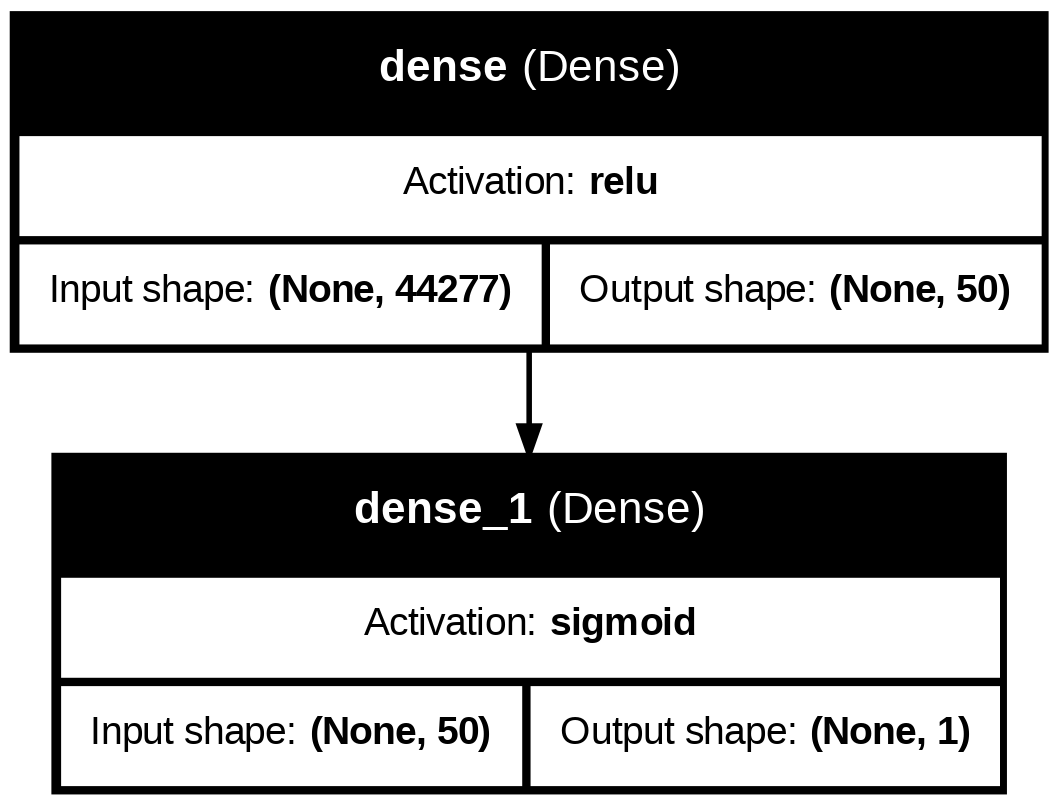

In [31]:
plot_model(
    model,
    show_layer_activations=True,
    show_shapes=True,
    show_layer_names=True
)

In [32]:
model.fit(
    X_train,
    np.array(train_labels),
    epochs=25,
    batch_size=10
)

Epoch 1/25
181/181 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7118 - loss: 0.5409
Epoch 2/25
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9974 - loss: 0.0287
Epoch 3/25
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0057
Epoch 4/25
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0021
Epoch 5/25
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 7.2926e-04
Epoch 6/25
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.0140e-04
Epoch 7/25
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 2.1297e-04
Epoch 8/25
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.3847e-04
Epoch 9/25
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 9.6475e-05
Epoch 10/25
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 6.1452e-05
Epoch 11/25
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.7962e-05
Epoch 12/25
181/181 ━━━━

In [35]:
model.evaluate(
    X_test,
    np.array(test_labels),
    batch_size=10
)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9060 - loss: 0.2549  


[0.258762001991272, 0.9100000262260437]

In [36]:
text1 = 'Best movie ever! It was great, I will definately recommend it.'
text2 = 'This is bad movie. Please dont watch it'

In [39]:
def predic_on_review(text):
    tokens = clean_doc(text)
    tokens = [w for w in tokens if w in vocabs]
    line = ' '.join(tokens)
    encoded = tokenizer.texts_to_matrix([line])
    review_prediction = model.predict(encoded, verbose=0)
    percent_pos = review_prediction[0,0]
    if round(percent_pos) == 0:
        return (1-percent_pos), 'NEGATIVE'
    return percent_pos, 'POSITIVE'


predic_on_review(text1), predic_on_review(text2)

((0.6757002, 'POSITIVE'), (0.6848843693733215, 'NEGATIVE'))